In [1]:
! pip install transformers torch seaborn wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 950.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline
import torch
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc
from sklearn.preprocessing import label_binarize

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
!ls /content/drive/My\ Drive

'AI prestentation.gdoc'			     Nupur_Project_ppt.pptx
 Classroom				     predictions_plot.png
'Colab Notebooks'			    'Project proposal.gdoc'
 df1_meta.csv				     reviews.txt
'Fake Postings.csv'			     Singh_nupur.pdf
'Fendous  blood group detection app.gdoc'    Sleep_health_and_lifestyle_dataset.csv
'Fendous@ detection of phishing mail.gdoc'  'spam (1).csv'
'kaggle (5).json'			     test.csv
'LISTEN TO YOUR HEART.gslides'		     tmdb_5000_movies1.csv
 movie_metadata.csv			     train.csv
 movies_metadata.csv			    'Untitled document.gdoc'
 new.csv				     val.csv


In [5]:

csv_path1 = "/content/drive/My Drive/train.csv"
csv_path2 = "/content/drive/My Drive/test.csv"
csv_path3 = "/content/drive/My Drive/val.csv"  # Ensure this file exists at this location

# Read the CSV files
train = pd.read_csv(csv_path1)
test = pd.read_csv(csv_path2)
val = pd.read_csv(csv_path3)



In [6]:
train.head()


,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,1,@user123,2024-11-03 08:45:00,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive
1,2,@politicsFan,2024-11-03 09:15:23,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive
2,3,@greenAdvocate,2024-11-03 10:05:45,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive
3,4,@indieVoice,2024-11-03 11:20:10,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral
4,5,@libertyLover,2024-11-03 12:35:55,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive


In [7]:
test.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,501,@user1068,2025-02-11 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,85,320,positive
1,502,@politicsNew2,2025-02-11 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,100,450,positive
2,503,@greenVisionary2,2025-02-11 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,60,200,positive
3,504,@indieWatcher2,2025-02-11 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,30,120,neutral
4,505,@libertyFan4,2025-02-11 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,50,160,positive


In [8]:
val.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment
0,551,@user1077,2025-02-21 08:30:10,Kamala Harris's new policy on education reform...,Kamala Harris,Democratic Party,85,320,positive
1,552,@politicsNew3,2025-02-21 09:15:20,Donald Trump's latest speech on the economy wa...,Donald Trump,Republican Party,100,450,positive
2,553,@greenVisionary3,2025-02-21 10:05:35,Jill Stein's environmental policies are a step...,Jill Stein,Green Party,60,200,positive
3,554,@indieWatcher3,2025-02-21 11:25:40,Robert Kennedy's independent run brings fresh ...,Robert Kennedy,Independent,30,120,neutral
4,555,@libertyFan5,2025-02-21 12:40:50,Chase Oliver's stance on gun rights is unwaver...,Chase Oliver,Libertarian Party,50,160,positive


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     500 non-null    int64 
 1   user_handle  500 non-null    object
 2   timestamp    500 non-null    object
 3   tweet_text   500 non-null    object
 4   candidate    500 non-null    object
 5   party        500 non-null    object
 6   retweets     500 non-null    int64 
 7   likes        500 non-null    int64 
 8   sentiment    500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     50 non-null     int64 
 1   user_handle  50 non-null     object
 2   timestamp    50 non-null     object
 3   tweet_text   50 non-null     object
 4   candidate    50 non-null     object
 5   party        50 non-null     object
 6   retweets     50 non-null     int64 
 7   likes        50 non-null     int64 
 8   sentiment    50 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.6+ KB


In [11]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     50 non-null     int64 
 1   user_handle  50 non-null     object
 2   timestamp    50 non-null     object
 3   tweet_text   50 non-null     object
 4   candidate    50 non-null     object
 5   party        50 non-null     object
 6   retweets     50 non-null     int64 
 7   likes        50 non-null     int64 
 8   sentiment    50 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.6+ KB


In [12]:
train.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

In [14]:
val.duplicated().sum()

0

In [15]:
train.describe()

,tweet_id,retweets,likes
count,500.000000,500.000000,500.000000
mean,250.500000,64.236000,248.920000
std,144.481833,27.715349,120.562034
min,1.000000,18.000000,85.000000
25%,125.750000,40.000000,150.000000
50%,250.500000,70.000000,225.000000
75%,375.250000,90.000000,340.000000
max,500.000000,120.000000,500.000000


In [16]:
test.describe()

,tweet_id,retweets,likes
count,50.00000,50.000000,50.000000
mean,525.50000,64.360000,248.400000
std,14.57738,27.942185,122.167667
min,501.00000,18.000000,85.000000
25%,513.25000,41.250000,150.000000
50%,525.50000,67.500000,222.500000
75%,537.75000,90.000000,340.000000
max,550.00000,115.000000,480.000000


In [17]:
val.describe()

,tweet_id,retweets,likes
count,50.00000,50.000000,50.000000
mean,575.50000,64.360000,248.400000
std,14.57738,27.942185,122.167667
min,551.00000,18.000000,85.000000
25%,563.25000,41.250000,150.000000
50%,575.50000,67.500000,222.500000
75%,587.75000,90.000000,340.000000
max,600.00000,115.000000,480.000000


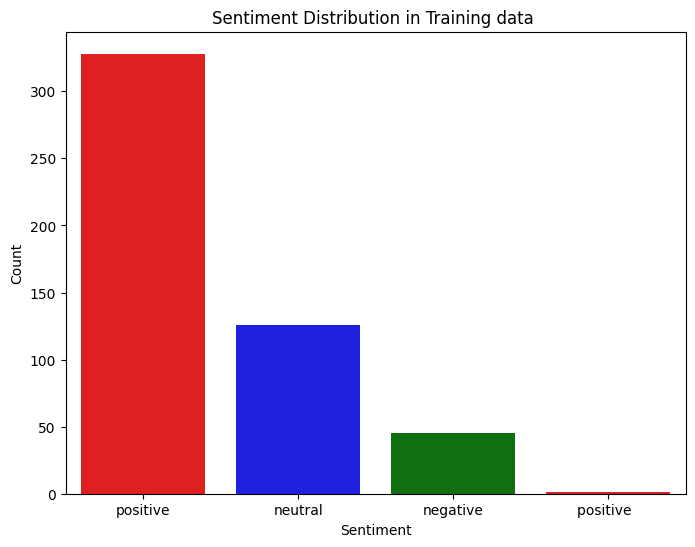

In [18]:
## sentiment distribution in train data
custom_palette = ["red", "blue", "green"]
plt.figure(figsize =(8,6))
sns.countplot(x = "sentiment",data = train,palette = custom_palette)
plt.title("Sentiment Distribution in Training data ")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [19]:
train["party"].value_counts()

,count
party,
Democratic Party,100
Republican Party,100
Green Party,100
Independent,100
Libertarian Party,100


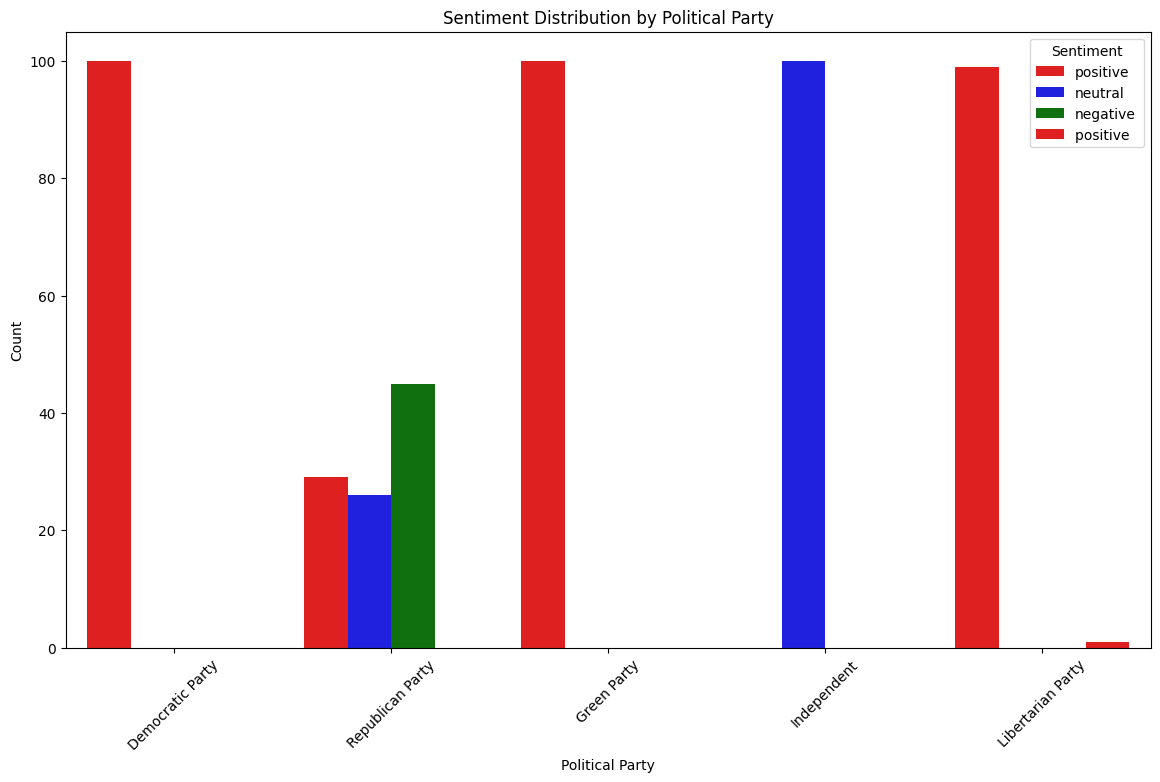

In [20]:
## sentiment distribution across parties:
plt.figure(figsize=(14,8))
sns.countplot(x = "party",hue = "sentiment",data= train,palette=custom_palette)
plt.title("Sentiment Distribution by Political Party")
plt.xlabel("Political Party")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.legend(title = "Sentiment")
plt.show()



In [21]:
## Add a new column for tweet length
train["tweet_length"]= train["tweet_text"].apply(lambda x:len(x.split()))
test["tweet_length"]= test["tweet_text"].apply(lambda x:len(x.split()))
val["tweet_length"]= val["tweet_text"].apply(lambda x:len(x.split()))

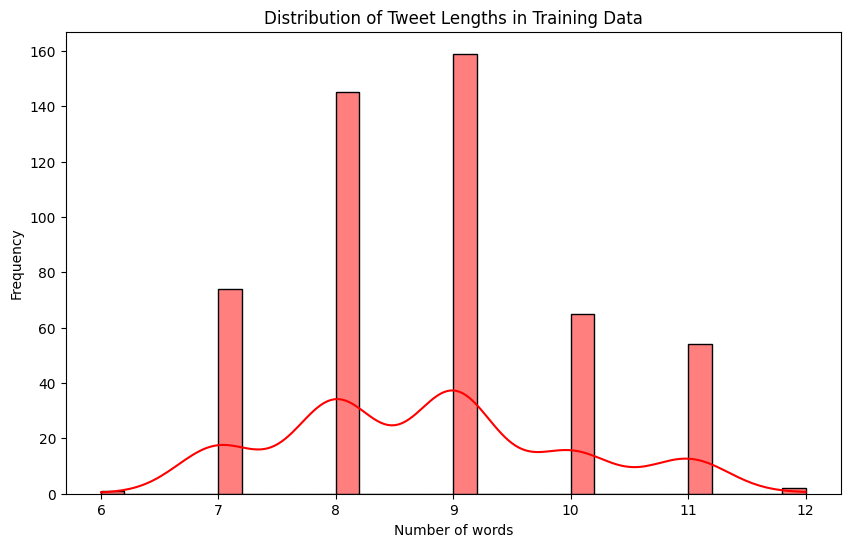

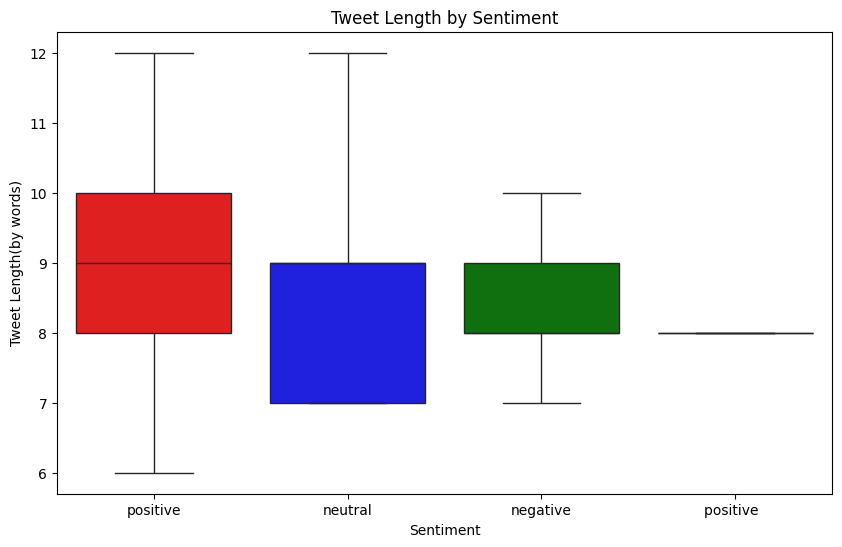

In [22]:
## PLOT Distribution of tweet_lengths:
plt.figure(figsize=(10,6))
sns.histplot(train["tweet_length"],bins=30,kde = True,color = "red")
plt.title("Distribution of Tweet Lengths in Training Data")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

## Box plot of tweet_length
plt.figure(figsize =(10,6))
sns.boxplot(x= "sentiment", y= "tweet_length",data = train,palette= custom_palette)
plt.title("Tweet Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length(by words)")
plt.show()

In [23]:
## convert timestamp to datetime
train["timestamp"] = pd.to_datetime(train["timestamp"])
test["timestamp"] = pd.to_datetime(test["timestamp"])
val["timestamp"] = pd.to_datetime(val["timestamp"])

train.set_index("timestamp",inplace=True)

<Figure size 1600x800 with 0 Axes>

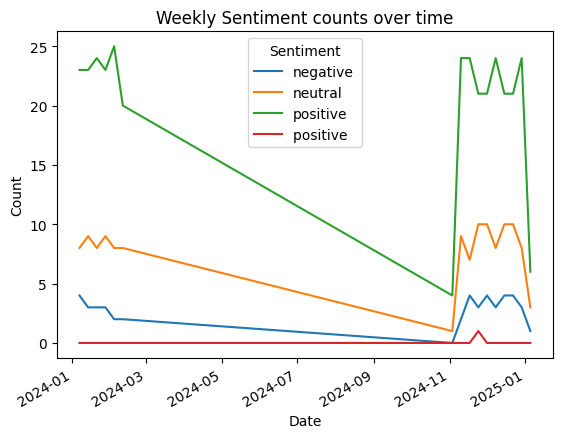

In [24]:
weekly_sentiment = train.groupby([pd.Grouper(freq="W"),"sentiment"]).size().unstack().fillna(0)

## plot time series  of sentiment:
plt.figure(figsize=(16,8))
weekly_sentiment.plot()
plt.title("Weekly Sentiment counts over time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend(title = "Sentiment")
plt.show()


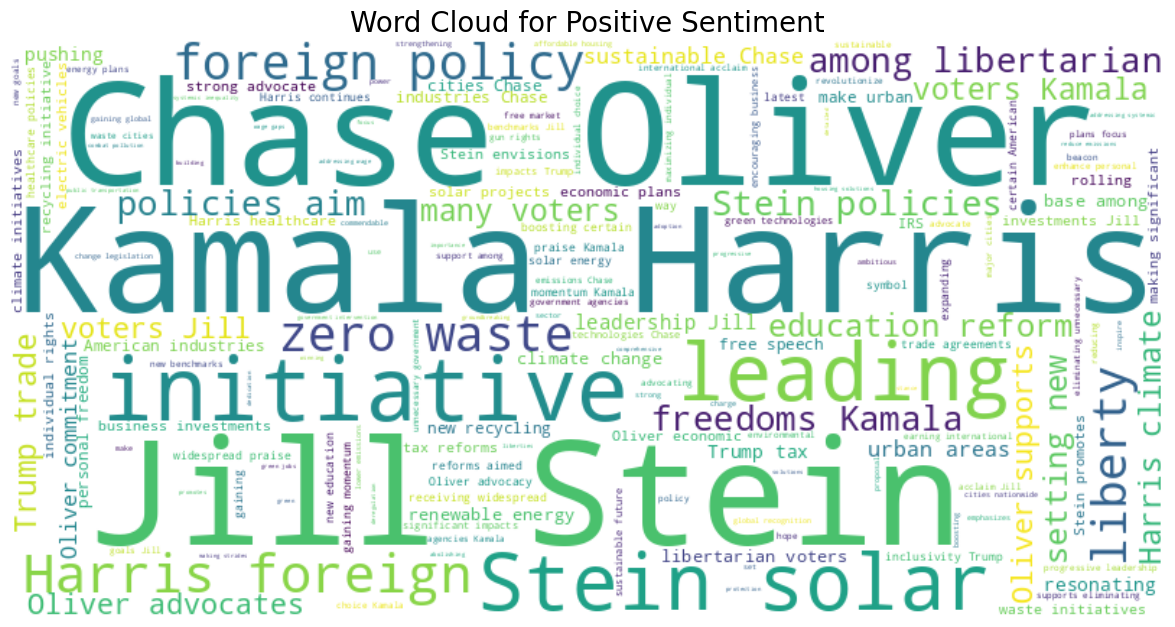

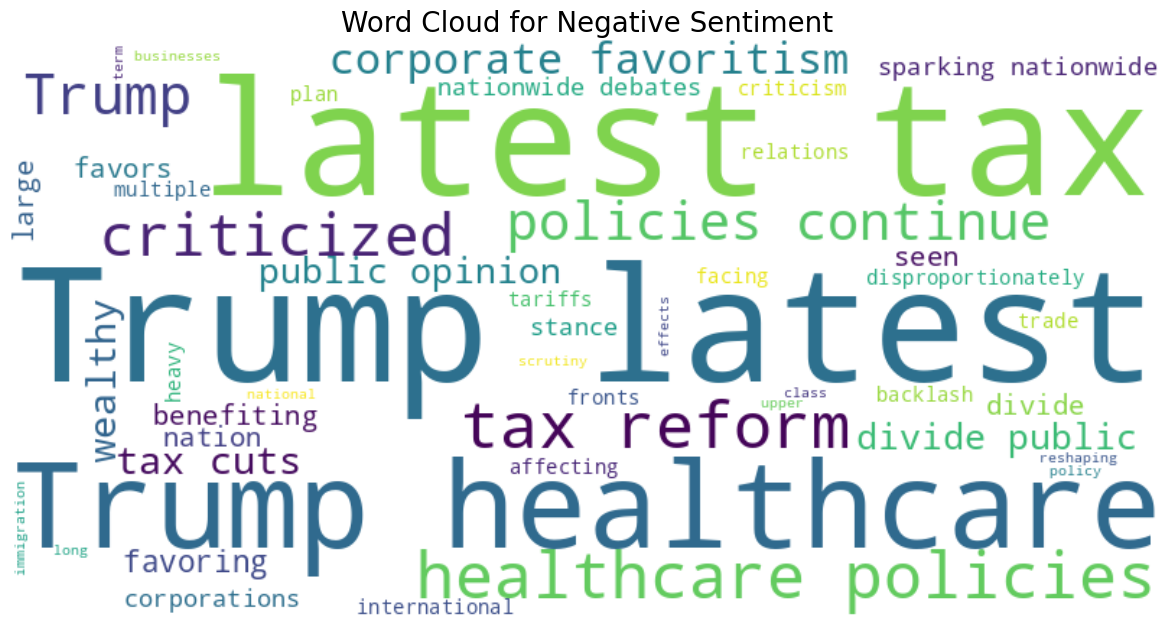

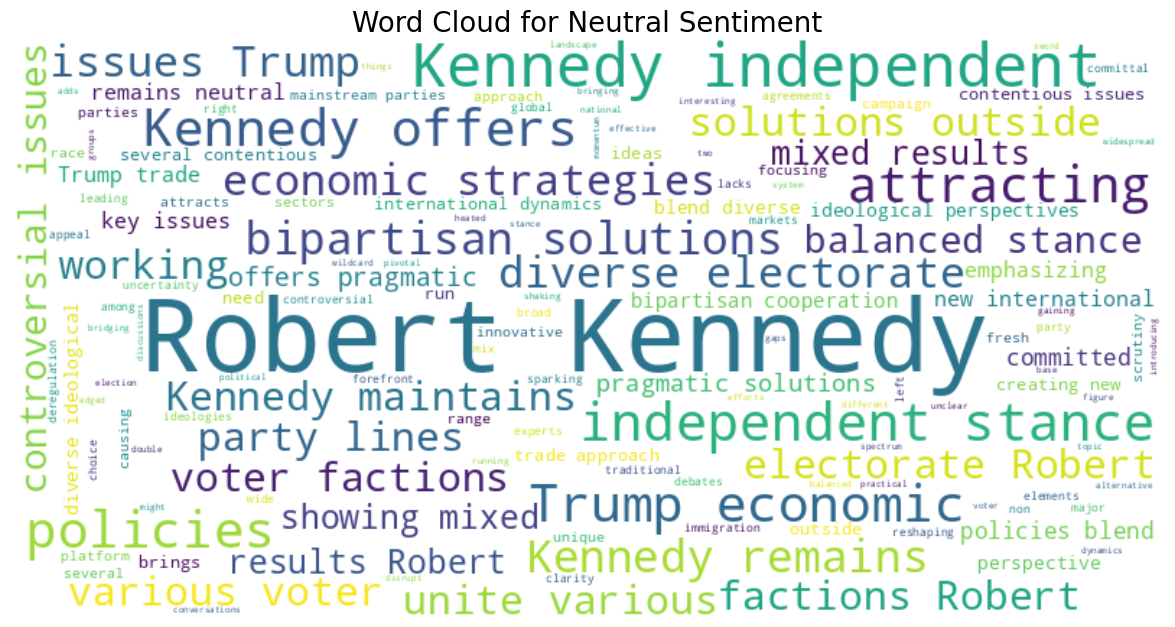

In [25]:
# Generate word clouds for each sentiment:
def generate_word_cloud(text,title):
  wordcloud = WordCloud(width=800,height = 400,background_color = "white",stopwords=STOPWORDS).generate(" ".join(text))
  plt.figure(figsize=(15,7.5))
  plt.imshow(wordcloud,interpolation="bilinear")
  plt.title(title,fontsize=20)
  plt.axis("off")
  plt.show()
## Generate word cloud for each sentiment:
for sentiment in ["positive","negative","neutral"]:
  subset = train[train["sentiment"]==sentiment]
  generate_word_cloud(subset["tweet_text"],f"Word Cloud for {sentiment.capitalize()} Sentiment")

In [26]:
## Data Preprocessing

In [27]:
data = pd.concat([train.reset_index(),test.reset_index(),val.reset_index()],ignore_index = True)

In [28]:
data.head()

,timestamp,tweet_id,user_handle,tweet_text,candidate,party,retweets,likes,sentiment,tweet_length,index
0,2024-11-03 08:45:00,1,@user123,Excited to see Kamala Harris leading the Democ...,Kamala Harris,Democratic Party,120,450,positive,9,NaN
1,2024-11-03 09:15:23,2,@politicsFan,Donald Trump's policies are the best for our e...,Donald Trump,Republican Party,85,300,positive,9,NaN
2,2024-11-03 10:05:45,3,@greenAdvocate,Jill Stein's environmental plans are exactly w...,Jill Stein,Green Party,60,200,positive,9,NaN
3,2024-11-03 11:20:10,4,@indieVoice,Robert Kennedy offers a fresh perspective outs...,Robert Kennedy,Independent,40,150,neutral,10,NaN
4,2024-11-03 12:35:55,5,@libertyLover,Chase Oliver's libertarian stance promotes tru...,Chase Oliver,Libertarian Party,30,120,positive,7,NaN


In [29]:
## FUNCTION TO BE CLEANED TWEET TEXT:
def clean_text(text):
  text = text.lower()
  text = re.sub(r"/http/S+", "",text)
  text = re.sub(r"@/W+", "",text)
  text = re.sub(r"[^a-zA-Z/s]", "",text)
  text = re.sub(r"#/W", "",text)
  return text

data["clean_text"]= data["tweet_text"].apply(clean_text)
data[["tweet_text","clean_text"]].head()

,tweet_text,clean_text
0,Excited to see Kamala Harris leading the Democ...,excitedtoseekamalaharrisleadingthedemocraticch...
1,Donald Trump's policies are the best for our e...,donaldtrumpspoliciesarethebestforoureconomy
2,Jill Stein's environmental plans are exactly w...,jillsteinsenvironmentalplansareexactlywhatweneed
3,Robert Kennedy offers a fresh perspective outs...,robertkennedyoffersafreshperspectiveoutsidethe...
4,Chase Oliver's libertarian stance promotes tru...,chaseoliverslibertarianstancepromotestruefreedom


In [30]:
data.isnull().sum()

,0
timestamp,0
tweet_id,0
user_handle,0
tweet_text,0
candidate,0
party,0
retweets,0
likes,0
sentiment,0
tweet_length,0


In [31]:
# Encode party using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["party_encoded"]= le.fit_transform(data["party"])
sentiment_mapping = {"negitave":0,"neutral":1,"positive":2}
data["sentiment_encoded"]= data["sentiment"].map(sentiment_mapping)

In [32]:
train = data.iloc[:500].copy()
test = data.iloc[500:550].copy()
val = data.iloc[550:600].copy()
train[["party","party_encoded","sentiment","sentiment_encoded"]].head()

,party,party_encoded,sentiment,sentiment_encoded
0,Democratic Party,0,positive,2.0
1,Republican Party,4,positive,2.0
2,Green Party,1,positive,2.0
3,Independent,2,neutral,1.0
4,Libertarian Party,3,positive,2.0


In [33]:
from huggingface_hub import login
from transformers import pipeline

# Log in to Hugging Face
login(token="TOKEN NUMBER")

# Initialize sentiment analysis pipeline with the correct pre-trained model
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Select a sample tweet from the training data
sample_tweet = train["tweet_text"].iloc[0]

# Print the sample tweet
print("Sample Tweet:", sample_tweet)

# Perform sentiment analysis on the sample tweet
print("Sentiment Analysis Result:", sentiment_pipeline(sample_tweet))


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Sample Tweet: Excited to see Kamala Harris leading the Democratic charge!
Sentiment Analysis Result: [{'label': 'POSITIVE', 'score': 0.9997492432594299}]


In [34]:
## inference pretrained model:
def analyze_sentiment(text):
  try:
    result = sentiment_pipeline(text[:512])[0]
    return result["label"],result["score"]
  except Exception as e:
    return "Error",0

# Apply sentiment analysis to training set:
# Apply sentiment analysis to the training, test, and validation sets
train[["predicted_sentiment", "confidence_score"]] = train["tweet_text"].apply(lambda x: pd.Series(analyze_sentiment(x)))
test[["predicted_sentiment", "confidence_score"]] = test["tweet_text"].apply(lambda x: pd.Series(analyze_sentiment(x)))
val[["predicted_sentiment", "confidence_score"]] = val["tweet_text"].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Display the first few rows with the predicted sentiment and confidence scores
print(train[["tweet_text", "predicted_sentiment", "confidence_score"]].head())


                                          tweet_text predicted_sentiment  \
0  Excited to see Kamala Harris leading the Democ...            POSITIVE   
1  Donald Trump's policies are the best for our e...            POSITIVE   
2  Jill Stein's environmental plans are exactly w...            POSITIVE   
3  Robert Kennedy offers a fresh perspective outs...            POSITIVE   
4  Chase Oliver's libertarian stance promotes tru...            POSITIVE   

   confidence_score  
0          0.999749  
1          0.999732  
2          0.999530  
3          0.999691  
4          0.998540  


In [35]:
## Performance metrics:
val["predicted_sentiment"] = val["tweet_text"].apply(lambda x:analyze_sentiment(x[0]))
val["predicted_sentiment"]= val["predicted_sentiment"].str.lower()
val["predicted_sentiment"] = pd.Categorical(val["predicted_sentiment"],categories=["negative","neutral","positive"])

# Check for missing predicted sentiments and handle them (using the new approach)
if val["predicted_sentiment"].isnull().any():
    print('Warning: Missing predicted sentiment found. Filling with "NEUTRAL".')
    val["predicted_sentiment"] = val["predicted_sentiment"].fillna("neutral")
    val["predicted_sentiment"]= val["predicted_sentiment"].fillna("neutral")

print("Unique values in val['sentiment']:", val["sentiment"].unique())
print("Unique values in val['predicted_sentiment']:", val["predicted_sentiment"].unique())

## Generate classification report :
print(classification_report(val["sentiment"],val["predicted_sentiment"],target_names=["negative","neutral","positive"]))

Unique values in val['sentiment']: ['positive' 'neutral' 'negative']
Unique values in val['predicted_sentiment']: ['neutral']
Categories (3, object): ['negative', 'neutral', 'positive']
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         3
     neutral       0.26      1.00      0.41        13
    positive       0.00      0.00      0.00        34

    accuracy                           0.26        50
   macro avg       0.09      0.33      0.14        50
weighted avg       0.07      0.26      0.11        50



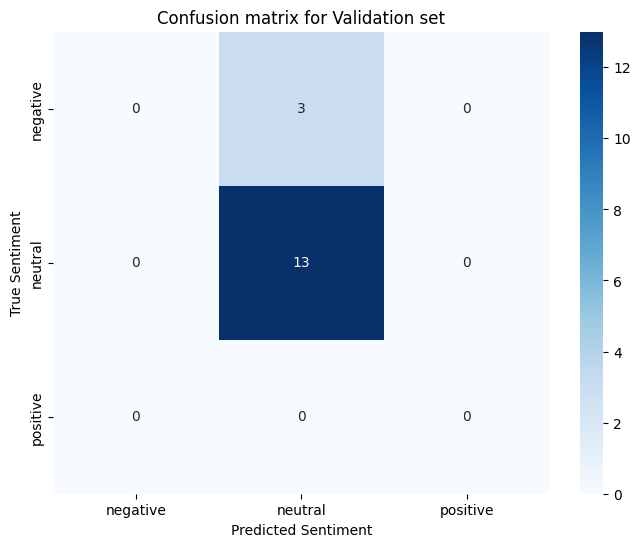

In [36]:
## Generate confusion matrix using lower case levels:
cm = confusion_matrix(val["sentiment"],val["predicted_sentiment"],labels=["negative","neutral","postive"])
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot = True,fmt = "d",cmap = "Blues",xticklabels=["negative","neutral","positive"],yticklabels=["negative","neutral","positive"])
plt.title("Confusion matrix for Validation set")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()

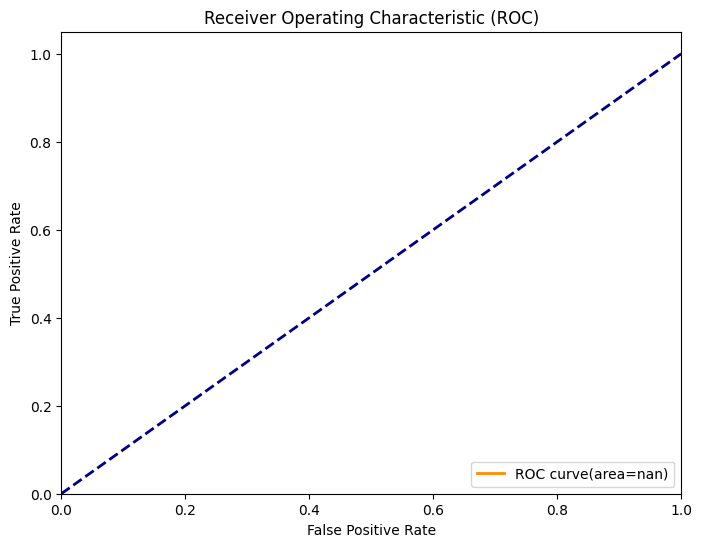

In [41]:
##ROC CURVE:
val["confidence"] = val["confidence_score"]
y_val_binarized = label_binarize(val["sentiment"],classes=["NEGATIVE","NEUTRAL","POSITIVE"])
n_classes = y_val_binarized.shape[1]
y_prob = val["confidence"]
y_true = (val["sentiment"]== "Positive").astype(int)
fpr,tpr,thresholds = roc_curve(y_true,y_prob)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color = "darkorange",lw = 2,label= "ROC curve(area=%0.2f)"%roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc = "lower right")
plt.show()

In [43]:
train.columns

Index(['timestamp', 'tweet_id', 'user_handle', 'tweet_text', 'candidate',
       'party', 'retweets', 'likes', 'sentiment', 'tweet_length', 'index',
       'clean_text', 'party_encoded', 'sentiment_encoded',
       'predicted_sentiment', 'confidence_score'],
      dtype='object')

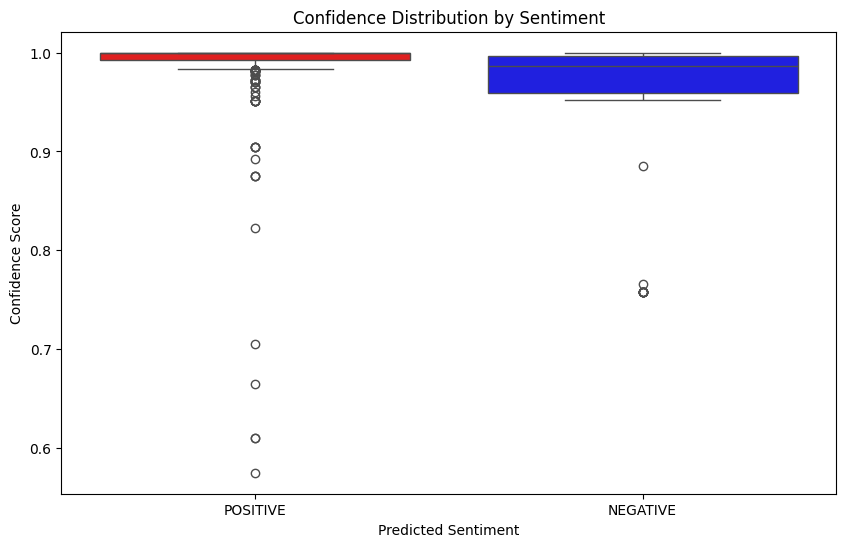

In [44]:
## Confidence distribution by sentiment:
plt.figure(figsize=(10,6))
sns.boxplot(x="predicted_sentiment",y= "confidence_score",data =train,palette=custom_palette)
plt.title("Confidence Distribution by Sentiment")
plt.xlabel("Predicted Sentiment")
plt.ylabel("Confidence Score")
plt.show()

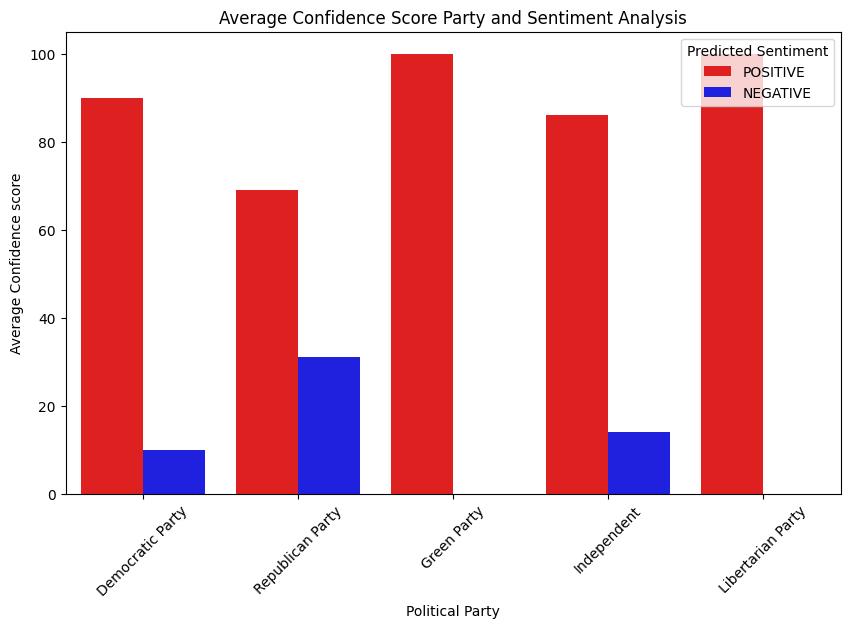

In [46]:
## party_wise sentiment analysis
plt.figure(figsize=(10,6))
sns.countplot(x="party",hue="predicted_sentiment",data=train,palette=custom_palette)
plt.title("Average Confidence Score Party and Sentiment Analysis")
plt.xlabel("Political Party")
plt.ylabel("Average Confidence score")
plt.xticks(rotation=45)
plt.legend(title="Predicted Sentiment")
plt.show()
